# Imports

In [2]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import tree
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize

np.random.seed(1234)

In [3]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.rcParams.update({"axes.grid": True, "figure.figsize": (8, 4)})
import seaborn as sns

# sns.set()

# Overview: Recommendation Systems

A recommendation engine is a machine learning algorithm that ranks or rates products based on certain criteria. As a general definition, a recommender system is a system that predicts the rating a user will give an item. The predictions are then ranked and returned to the user.

Recommender systems fall into three main categories:
- Content-based filtering uses similarities in the features of products, services, and content to make recommendations
- Collaborative filtering uses similar users' preferences to provide recommendations to a particular user
- Hybrid recommender systems combine multiple recommender strategies to make recommendations, using the advantages of each in different ways

# 19.1 Introduction

# 19.2 Conceptual Framing

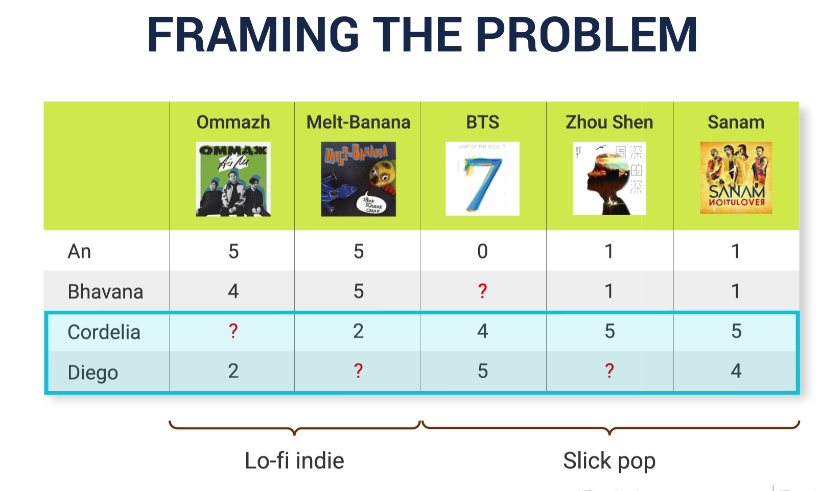

# Overview - Content Based Filtering

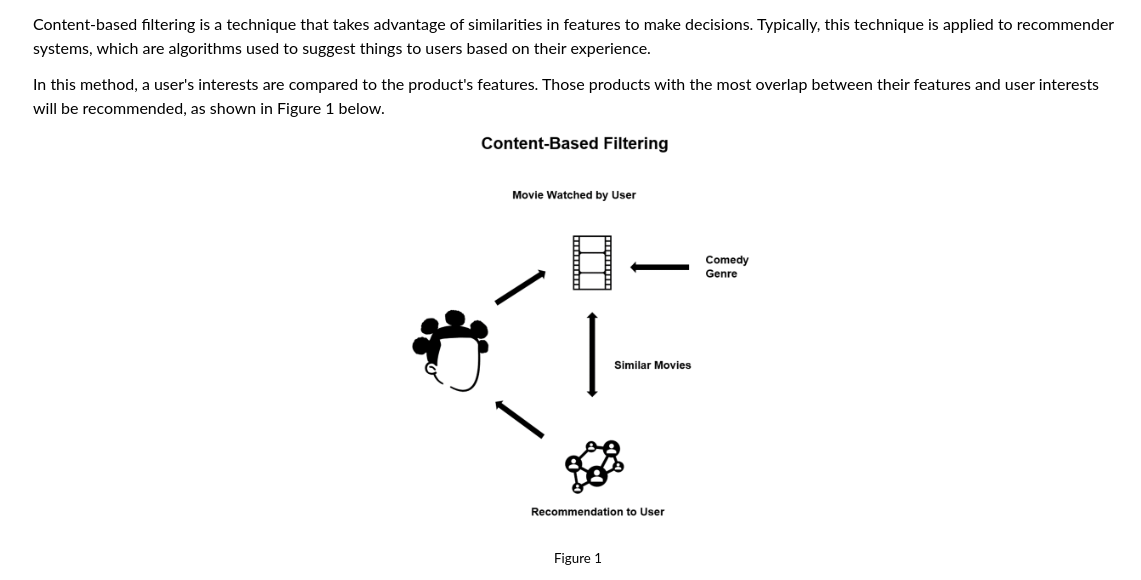

# 19.3 Content-Based Filtering

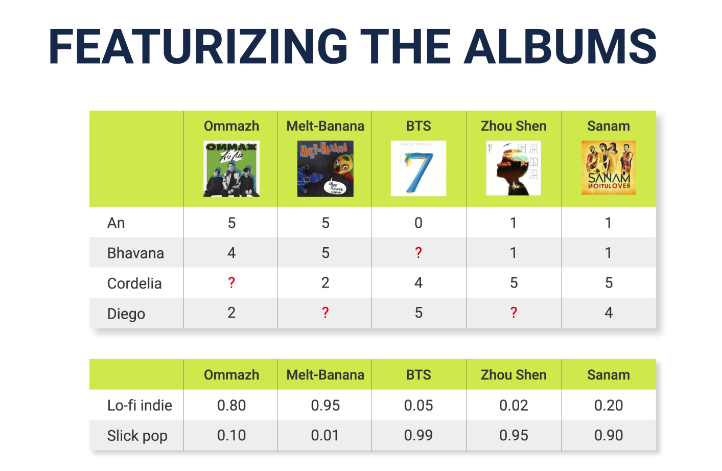

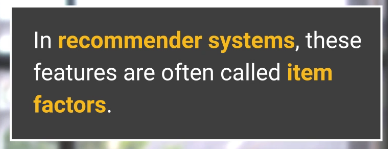

Now you can collect the item factors in a data frame and fit with linear regression
- The resulting linear regression parameters (coefficients of the model) are called user factors
- A prediction is then the dot product of the item factors and the user factors, plus the bias term

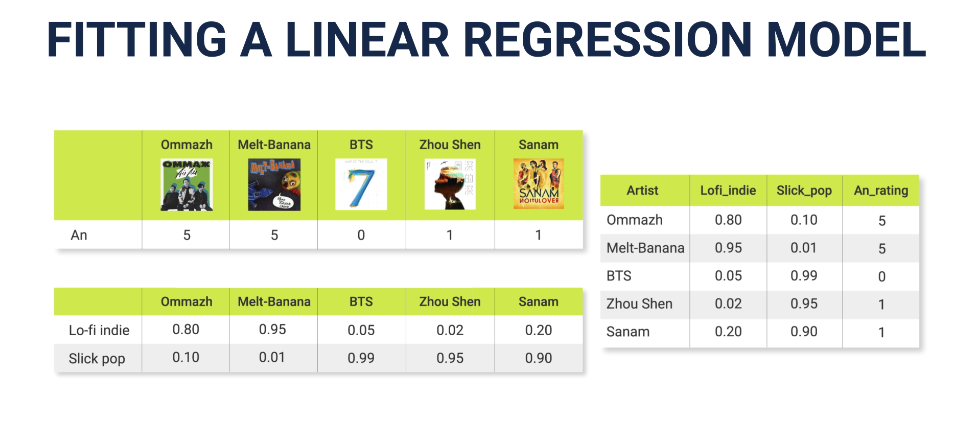

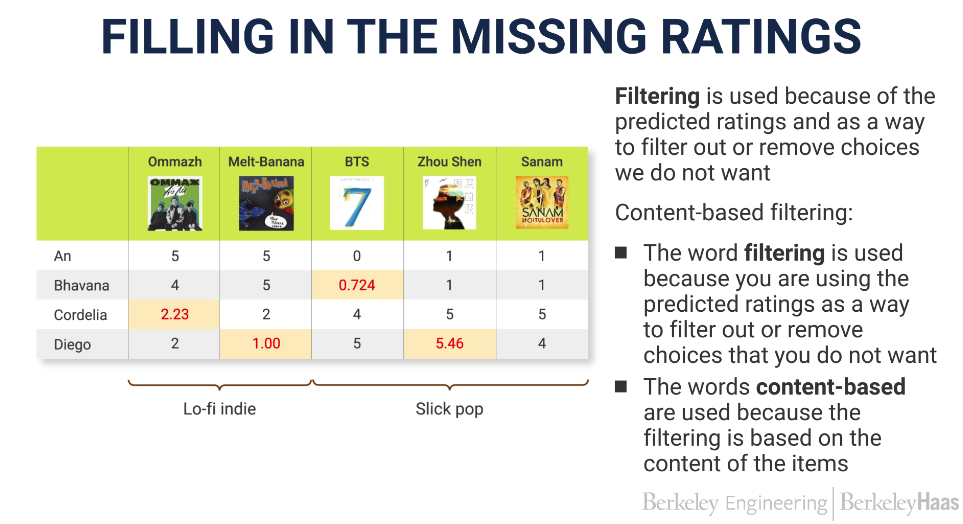

Professor Hug closes by saying that this approach is difficult in the real world because before fitting and operating such a model,
- You would have to decide a priori what all the categories should be (lo fi, slick pop, etc...)
- And then you would have to rate them

# Overview - Collaborative Filtering

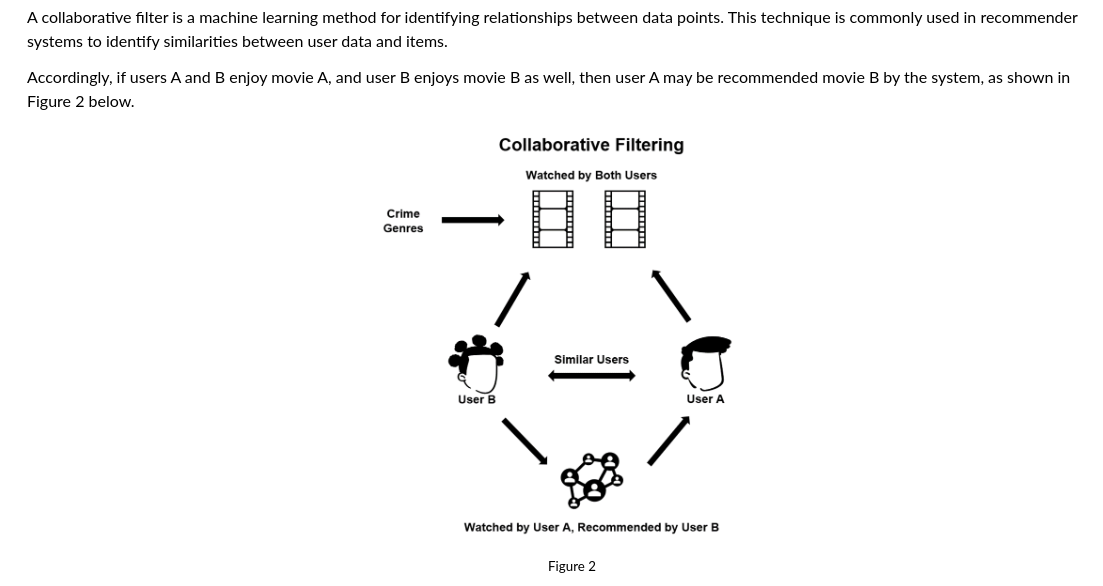

# 19.4 Collaborative Filtering

Rehashing the prior approach

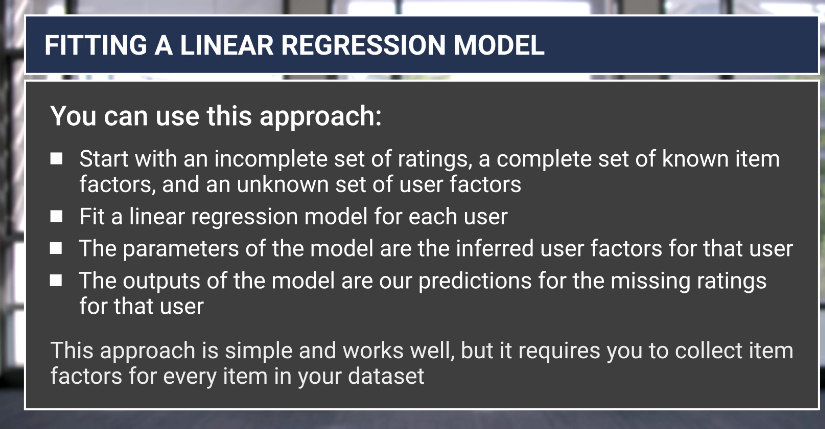

Reframing the prior approach, what if you survey the user to provide their own preferences (scores) for each of the item factors

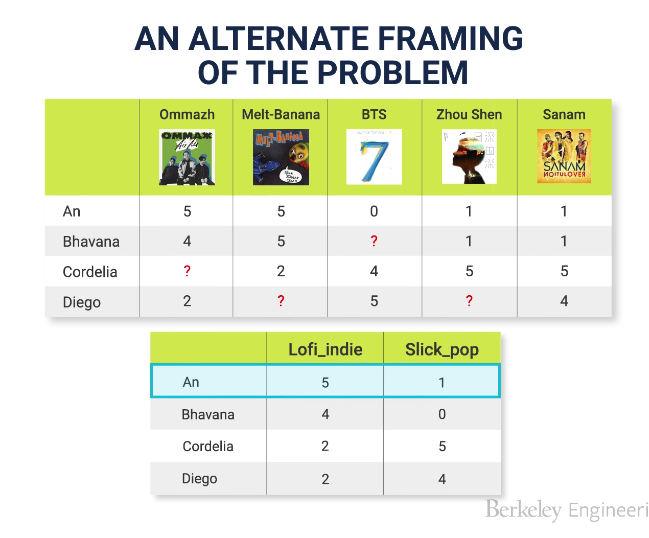

Then fit a model that uses all provided user preferences as features, and target as provided ratings per artist
- So now a missing user score is filled in by plugging their self-reported user factor in this model

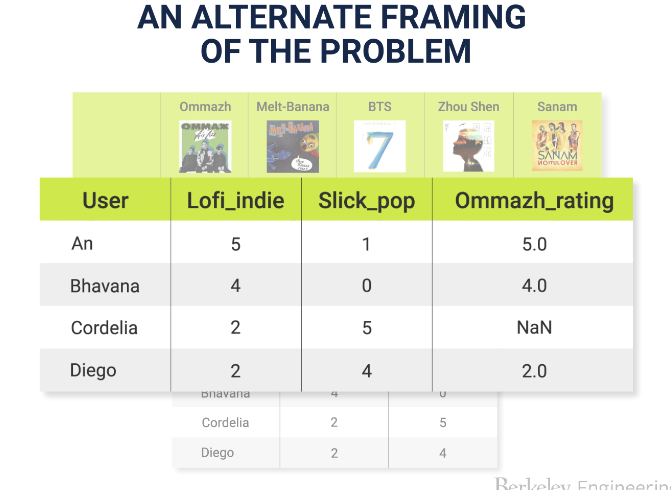

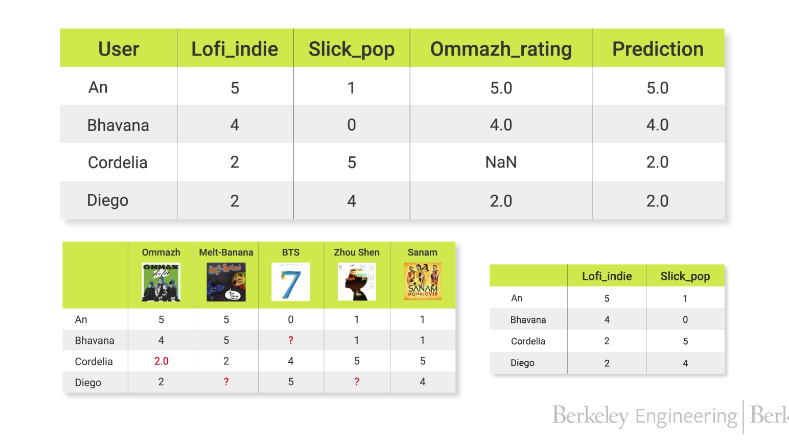

This approach works but has similar drawbacks as before
- You still have to conceptualize the various categories to rate against (lofi, slick pop, has female vocalist, etc...)
- AND! you have to have users populate their data, which they don't want to do

Enter the **collaborative filtering** scheme
- Random feature values are made up
    - The number of features is a hyperparameter
    - The initial values are random
    - The features are anonymous and thus not interpretable
- From these features, new item factors are predicted
- From these new item factors, updated user factors are predicted
- This is iterated until the score attains an acceptable value

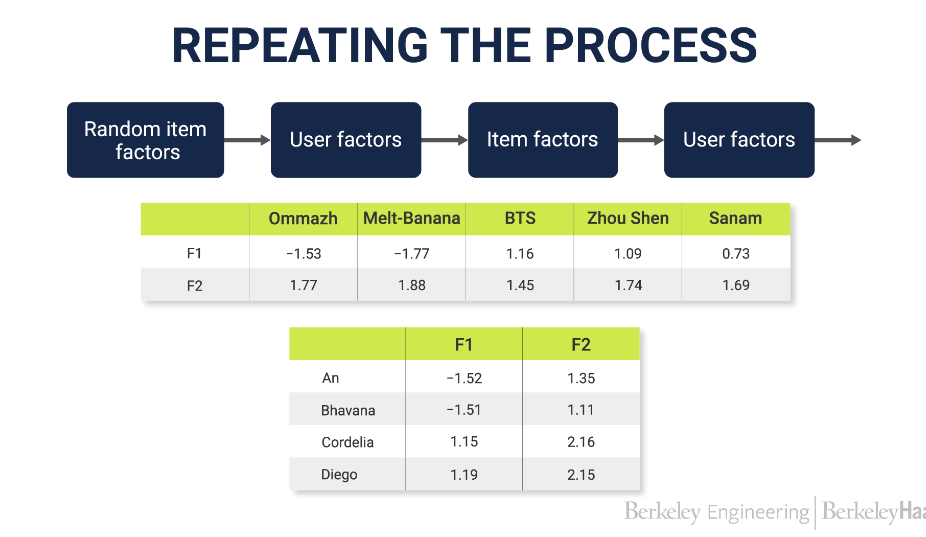

# 19.5 Gradient Descent View of Collaborative Filtering

Prior method of iterative fit on successive transposes of the data, swapping user factors and item factors works but is inefficient
- Instead, consider gradient descent that operates on both at once
- In the figure below, P are user factors and Q are item factors

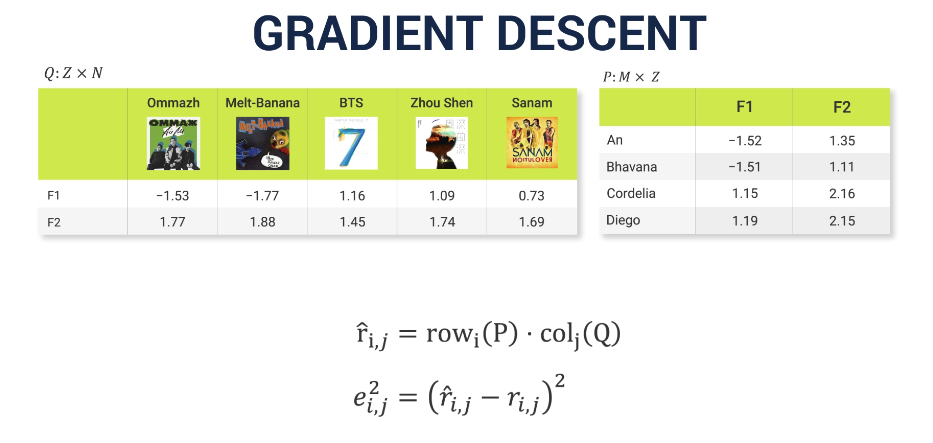

Pop quiz - compute the squared error Coredelia's rating of melt banana

In [7]:
rij_hat = np.dot(np.array([1.15, 2.16]), np.array([-1.77, 1.88]))
rij = 2.0
err_squared = (rij_hat - rij) ** 2
[
    rij_hat,
    rij_hat - rij,
    err_squared,
]

[2.0253000000000005, 0.025300000000000544, 0.0006400900000000275]

To get the MSE, compute rij_hat for each i and for each j such that a rating was provided
- The notation for the second summation is saying j for which rij is defined
- i.e. the cases that a rating was provided

Note that the equation is wrong, that is not the **mean** of squared errors but the **sum** of squared errors
- But we get the idea

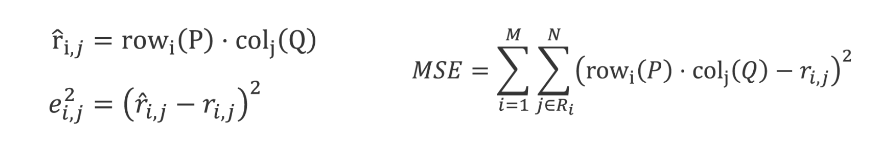

Pop quiz - how many terms in the MSE equation will appear
- i.e. how many dot products are defined?
- should be the 4x5 minus the 4 undefined values, so **16** total

New notation, refer to the elements of the P (Q) matrices as Pij (Qij) e.g. P1,1 P1,2 etc...
- in this example there are 18 total parameters

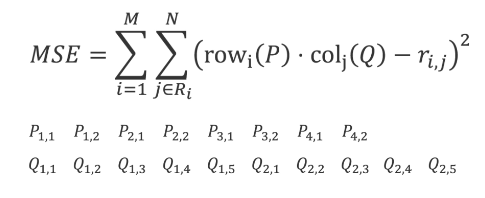

Gradient descent rule
- The update term arises from the partial derivative of the MSe w.r.t. Q
- and a similar rule exists for P

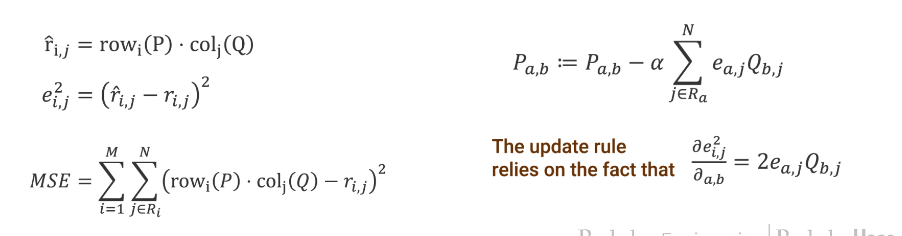

Pop quiz, try to compute updated P4,1 (diego / F1) using alpha = 0.1

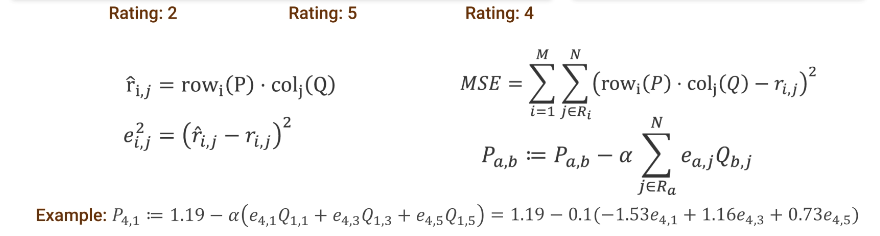

In [23]:
P4 = np.array([1.19, 2.15])
Q = np.array([[-1.53, 1.77], [1.16, 1.45], [0.73, 1.69]]).T
ri = np.array([2.0, 5.0, 4.0])
ri_hat = P4 @ Q
e = ri_hat - ri
alpha = 0.1
[
    ri_hat,
    e,
    P4[0] - alpha * np.sum(e * Q[0, :]),
]

[array([1.9848, 4.4979, 4.5022]),
 array([-0.0152, -0.5021,  0.5022]),
 1.2092574]

# Video 19.5 Alternate View using Matrix Factorization

Review - what would An's predicted rating be for Ommazh?
- Answer: compute P @ Q, then examine the upper left corner of the resulting 4 x 5 matrix

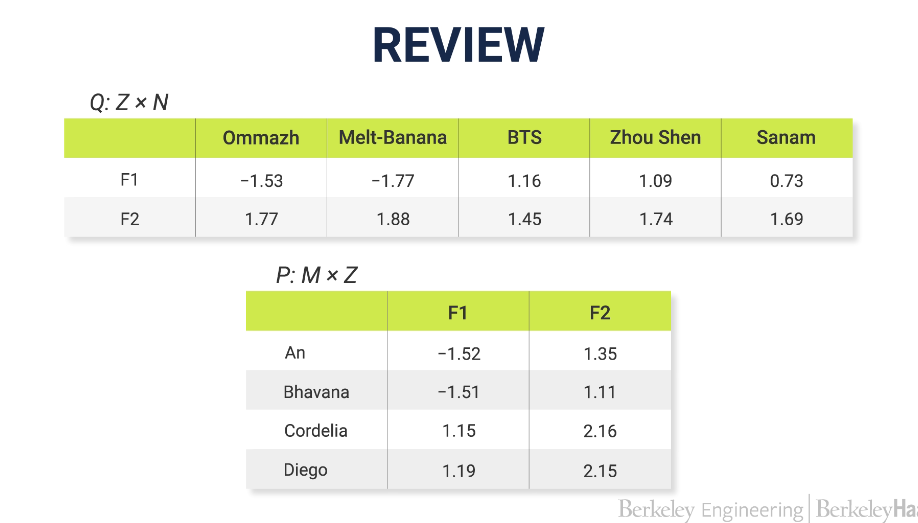

In [24]:
np.array([-1.52, 1.35]) @ np.array([-1.53, 1.77])

4.7151000000000005

Important terminology note: the SVD in *Funk SVD* is not a true SVD
- But it is often referred to as such anyway
- Because the author that introduced the 2 matrix factorization (P, Q) used above said it was kind of the same thing

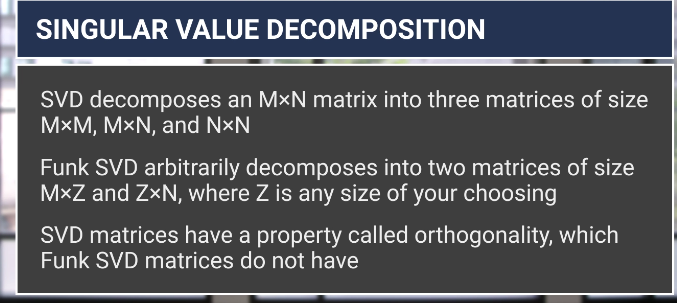

So why not use the actual SVD?
- Because the data sets are missing many values
- so that we need a different factorization that can deal with that

# Mini-Lesson 19.1: Other Matrix Factorization Techniques

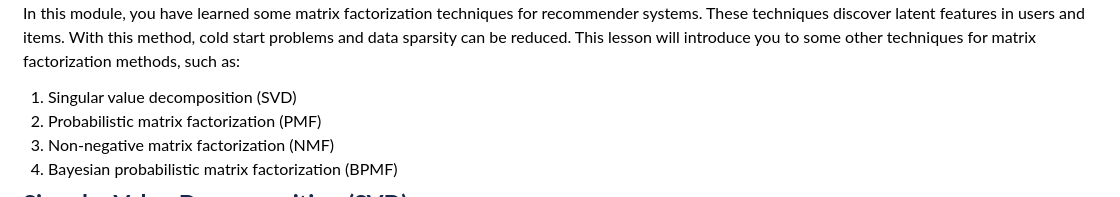

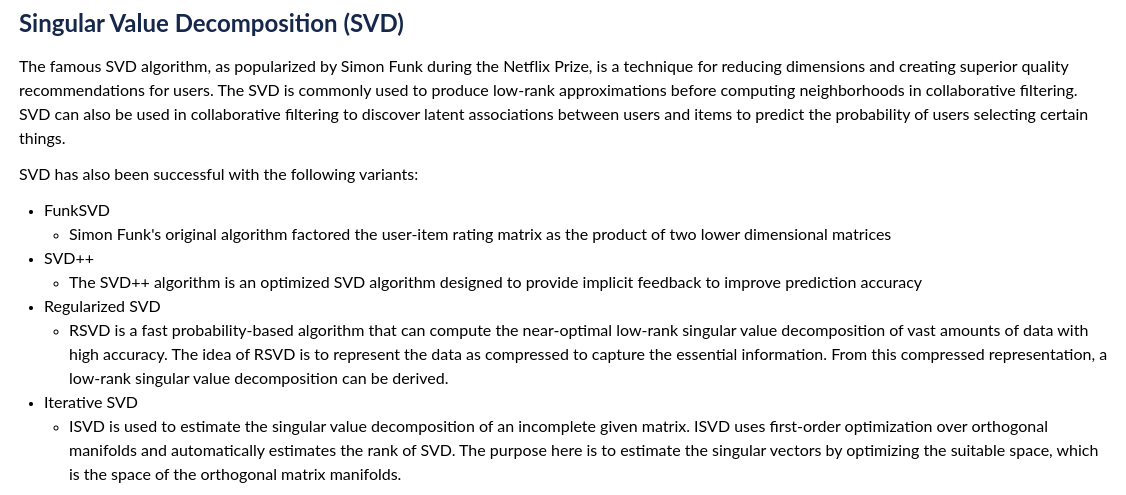

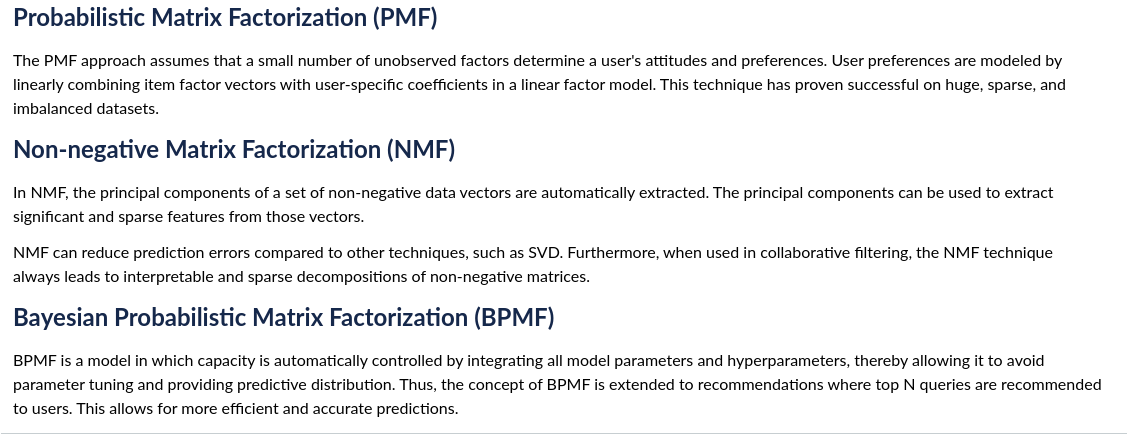